# Múltiplos Regressores

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.express as px

## Novos dados de temperatura

In [5]:
url1 = 'https://github.com/allanspadini/livro-val-allan/raw/main/DailyDelhiClimateTrain.csv'
url2 = 'https://github.com/allanspadini/livro-val-allan/raw/main/DailyDelhiClimateTest.csv'

In [6]:
dado = pd.read_csv(url1)
dado.columns = ['data','temperatura_m','umidade','vel_vento','pressao_m']
dado['data'] = pd.to_datetime(dado['data'])
round(dado.head())

data  temperatura_m  umidade  vel_vento  pressao_m
0 2013-01-01           10.0     84.0        0.0     1016.0
1 2013-01-02            7.0     92.0        3.0     1018.0
2 2013-01-03            7.0     87.0        5.0     1019.0
3 2013-01-04            9.0     71.0        1.0     1017.0
4 2013-01-05            6.0     87.0        4.0     1016.0

In [7]:
fig = px.scatter_3d(dado, x='umidade', y='data', z='temperatura_m',
              color='pressao_m',color_continuous_scale=px.colors.cyclical.IceFire,size='vel_vento')
fig.show()

Vamos tirar tirar os outliers:

In [9]:
dado = dado.query('pressao_m < 7000')

In [10]:
fig = px.scatter_3d(dado, x='umidade', y='data', z='temperatura_m',
              color='pressao_m',color_continuous_scale='greys',size='vel_vento')
fig.show()

In [11]:
fig = px.imshow(abs(dado.iloc[:, 1:].corr()),color_continuous_scale='greys')
fig.show()

In [12]:
# Importação das bibliotecas
from prophet import Prophet
import matplotlib.pyplot as plt

In [13]:
# Separação dos dados de treino e teste
df_treino = pd.DataFrame()

df_treino = dado.rename(columns={'temperatura_m': 'y', 'data':'ds'})

df_treino.head()

ds          y    umidade  vel_vento    pressao_m
0 2013-01-01  10.000000  84.500000   0.000000  1015.666667
1 2013-01-02   7.400000  92.000000   2.980000  1017.800000
2 2013-01-03   7.166667  87.000000   4.633333  1018.666667
3 2013-01-04   8.666667  71.333333   1.233333  1017.166667
4 2013-01-05   6.000000  86.833333   3.700000  1016.500000

In [14]:
df_teste = pd.read_csv(url2)

df_teste.columns = ['ds','y','umidade','vel_vento','pressao_m']

df_teste['ds'] = pd.to_datetime(df_teste['ds'])

df_teste.head()

ds          y    umidade  vel_vento    pressao_m
0 2017-01-01  15.913043  85.869565   2.743478    59.000000
1 2017-01-02  18.500000  77.222222   2.894444  1018.277778
2 2017-01-03  17.111111  81.888889   4.016667  1018.333333
3 2017-01-04  18.700000  70.050000   4.545000  1015.700000
4 2017-01-05  18.388889  74.944444   3.300000  1014.333333

In [15]:
# Ajuste do modelo
modelo = Prophet()     # Inicializa o modelo Prophet com configurações padrão
modelo.fit(df_treino)  # Ajusta o modelo aos dados de treinamento

# Criação do dataframe futuro para previsões
dataframefuturo = modelo.make_future_dataframe(freq='D', periods=114)  # Gera datas futuras para previsão

# Geração das previsões com base no modelo ajustado
previsao = modelo.predict(dataframefuturo)                             # Realiza a previsão para as datas geradas

15:39:07 - cmdstanpy - INFO - Chain [1] start processing
15:39:07 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
previsao.head()

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-01-01  24.671530    9.150315   14.152668    24.671530    24.671530   
1 2013-01-02  24.671767    9.400717   14.445257    24.671767    24.671767   
2 2013-01-03  24.672003    9.190278   14.398011    24.672003    24.672003   
3 2013-01-04  24.672240    9.263650   14.656250    24.672240    24.672240   
4 2013-01-05  24.672477    9.260969   14.566718    24.672477    24.672477   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0      -12.941505            -12.941505            -12.941505  0.033273   
1      -12.805178            -12.805178            -12.805178  0.145457   
2      -12.844953            -12.844953            -12.844953  0.066313   
3      -12.831974            -12.831974            -12.831974  0.026653   
4      -12.864761            -12.864761            -12.864761 -0.070036   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0      0.033273      0.033273 -12.974778    -12.974778    -12.974778   
1      0.145457      0.145457 -12.950635    -12.950635    -12.950635   
2      0.066313      0.066313 -12.911266    -12.911266    -12.911266   
3      0.026653      0.026653 -12.858628    -12.858628    -12.858628   
4     -0.070036     -0.070036 -12.794725    -12.794725    -12.794725   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  11.730025  
1                         0.0  11.866589  
2                         0.0  11.827051  
3                         0.0  11.840266  
4                         0.0  11.807716

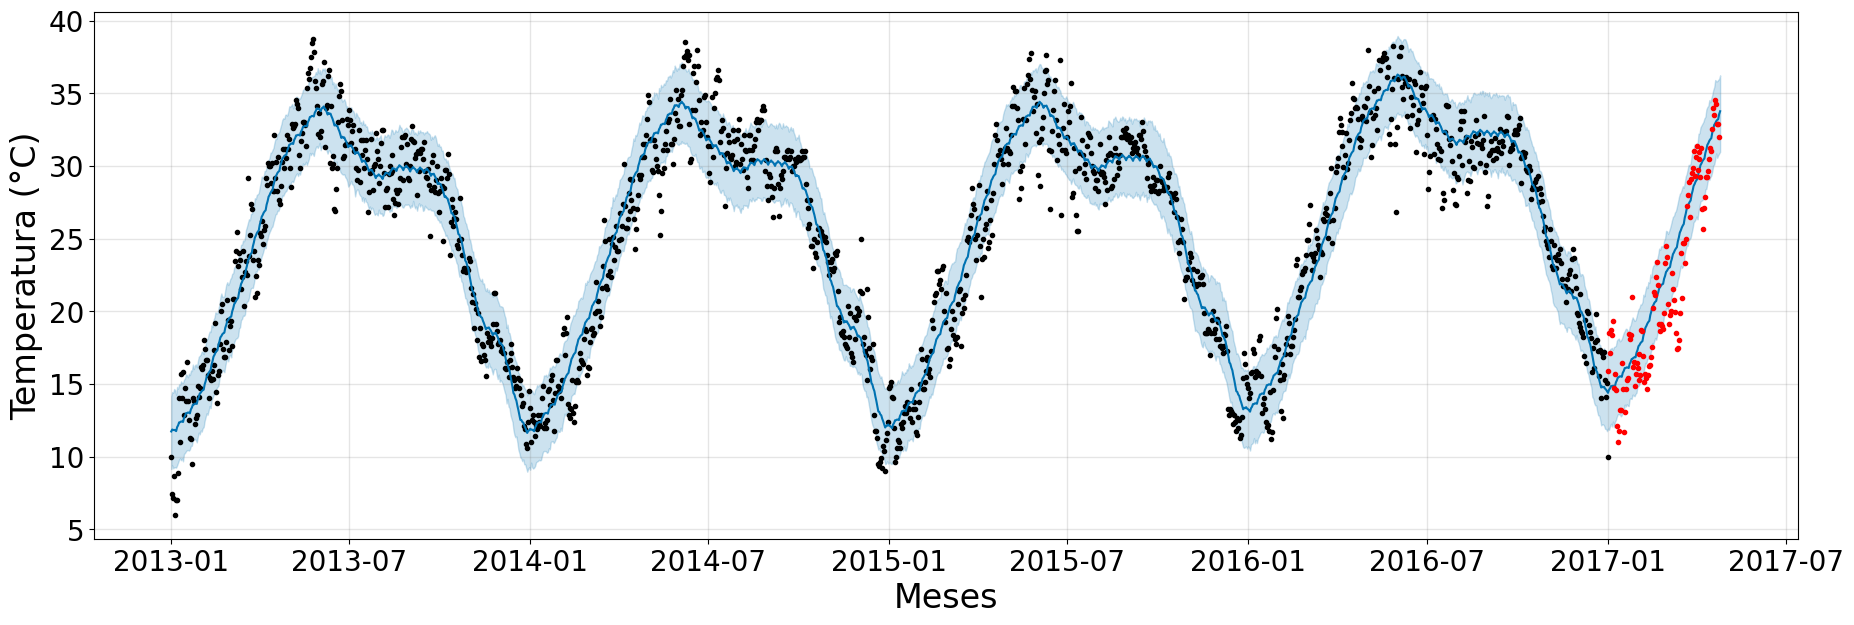

In [17]:
#Construção do gráfico
fig = modelo.plot(previsao,figsize=(18,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Meses', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.plot(df_teste['ds'],df_teste['y'],'.r');

*Gráfico da previsão da temperatura pelo tempo.*

In [19]:
from sklearn.metrics import mean_absolute_error

# Calcula o erro absoluto médio (MAE) entre os valores previstos e os valores reais de treino
mean_absolute_error(previsao['yhat'][:1461], df_treino['y'])

1.5990658681169674

In [20]:
# Calcula o erro absoluto médio (MAE) entre os valores previstos e os valores reais de teste
mean_absolute_error(previsao['yhat'][1461:],df_teste['y'])

2.2398958871803147

### Adicionando um regressor externo

In [21]:
# Inicializa o modelo Prophet
modelo = Prophet()

# Adiciona um regressor externo chamado 'umidade' para influenciar as previsões
modelo.add_regressor('umidade');

In [22]:
# Treina o modelo Prophet com os dados de treino
modelo.fit(df_treino)  

# Cria um DataFrame futuro com 114 períodos adicionais para previsão
dataframefuturo = modelo.make_future_dataframe(periods=114)  

15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
# Concatena a variável 'umidade' dos conjuntos de treino e teste
umidade = pd.concat([df_treino['umidade'], df_teste['umidade']])  

# Adiciona a variável 'umidade' ao DataFrame futuro para previsão
dataframefuturo['umidade'] = umidade.values  

# Gera previsões utilizando o modelo Prophet treinado
previsao = modelo.predict(dataframefuturo);

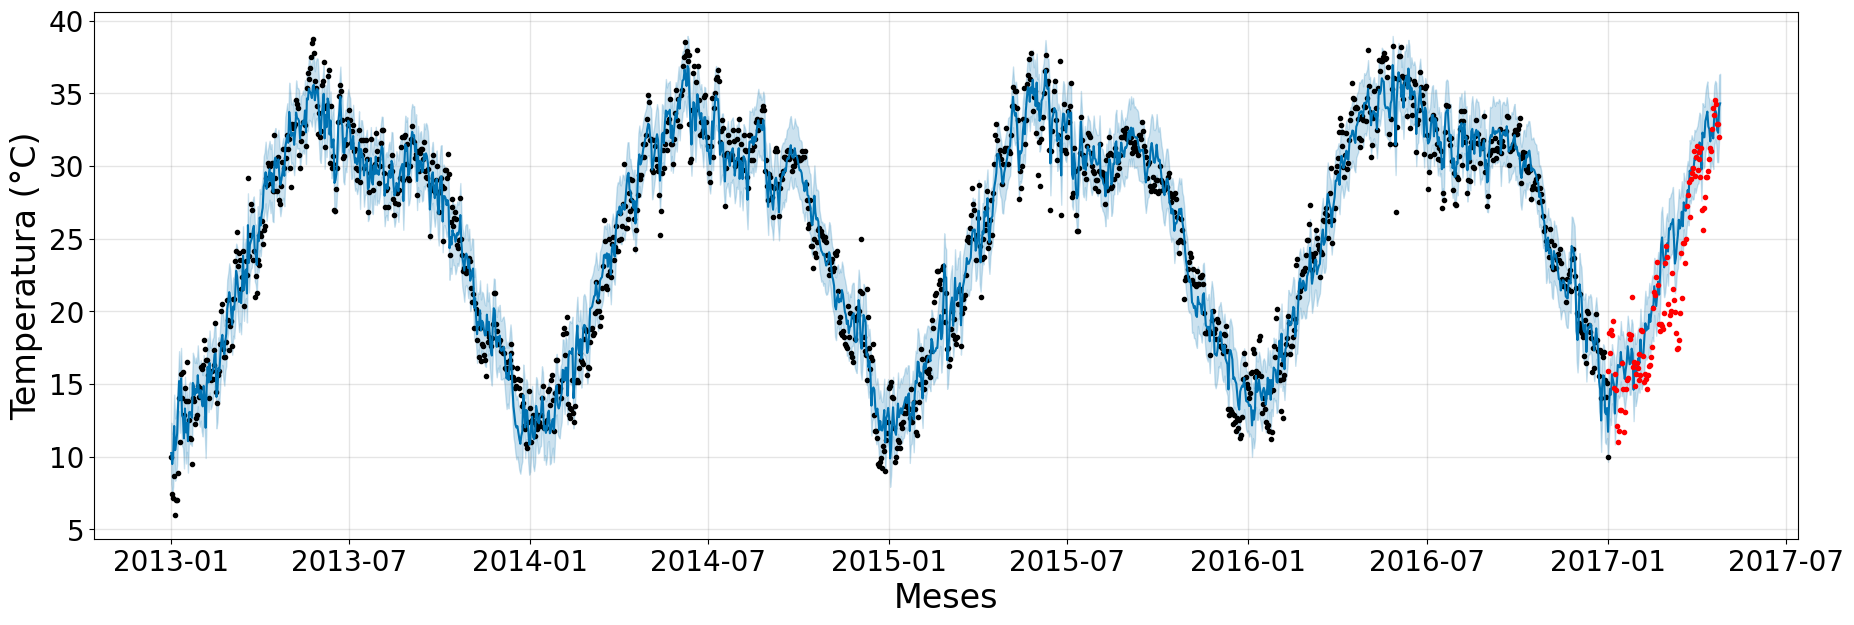

In [24]:
#Construção do gráfico
fig = modelo.plot(previsao,figsize=(18,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Meses', fontsize=24)
plt.ylabel('Temperatura (°C)', fontsize=24)
plt.plot(df_teste['ds'],df_teste['y'],'.r');

In [25]:
mean_absolute_error(previsao['yhat'][:1461],df_treino['y'])

1.2681940839346844

In [26]:
mean_absolute_error(previsao['yhat'][1461:],df_teste['y'])

2.5970817078818715

Se  você  comparar  os  resultados  obtidos  agora  com  o  caso
anterior,  verá que obtivemos um  ajuste melhor para os dados de
treino no caso em que utilizamos o regressor adicional. Já para os
dados de teste, a situação foi inversa. Em ambos os casos tivemos
bons  ajustes,  mas  a  utilização  de  um  regressor  extra  produziu
sobreajuste aos dados de treino. Ou seja, o ajuste melhor aos dados
de treino não se traduziu em uma melhoria ao ajuste dos dados de teste. Isso não ocorrerá em todos os casos.